In [1]:
import os
import numpy as np
import scipy.io.wavfile as wav
from sklearn import preprocessing
import joblib
from IPython import embed
import matplotlib.pyplot as plt
import librosa
import librosa.display

def powerNmelSpectrogram(stft, ch = None):
    mel = librosa.feature.melspectrogram( S = stft)
    # power spectrogram
    db = librosa.amplitude_to_db(abs(stft), ref=np.max)
    plt.figure(figsize=(12, 4))
    plt.subplot(1,2,1)
    librosa.display.specshow(db, x_axis='time', y_axis='log')
    plt.title('power spectrogram')
    # mel spectrogram
    db = librosa.amplitude_to_db(abs(mel), ref=np.max)
    plt.subplot(1,2,2)
    librosa.display.specshow(db, x_axis='time', y_axis='mel')
    plt.title('mel spectrogram')

In [2]:
fs, data = wav.read('/home/serafeim/tfdata/dataset/foa_dev/split1_ir0_ov1_1.wav') # shape : (time_points = 2820031,channels = 4)
# sampling frequency: fs = 48000

#fs = 48000  # sampled at 48000Hz
hop_len_s = 0.02
hop_len = int(fs * hop_len_s)
frame_res = fs / float(hop_len)
nb_frames_1s = int(frame_res)
win_len = 2 * hop_len
nfft = 2 ** (win_len - 1).bit_length()
eps = np.spacing(np.float(1e-16))
data = data[:,:] / 32768.0 + eps
audio_max_len_samples = 60 * fs
max_frame = int(np.ceil(audio_max_len_samples / float(hop_len)))

In [3]:
stft_ch = [ librosa.core.stft( np.asfortranarray(data[:,ch]), 
                               n_fft=nfft, 
                               hop_length=hop_len,
                               win_length=win_len, 
                               window='hann'
                             ) 
                              for ch in range(data.shape[1])
          ]
# for ch in range(len(data[0,:])):
#     stft_ch.append(librosa.core.stft(np.asfortranarray(data[:,ch]), n_fft=nfft, hop_length=hop_len,\
#                                         win_length=win_len, window='hann'))
# print(type(stft_ch))

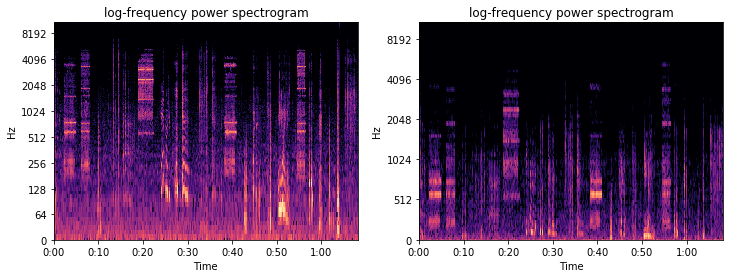

In [4]:
# 1st channel plot
powerNmelSpectrogram(stft_ch[0])

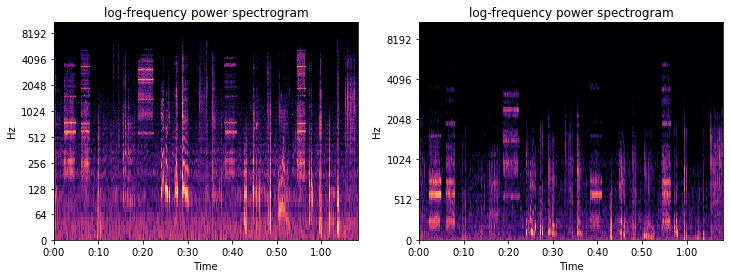

In [5]:
# 2nd channel plot
powerNmelSpectrogram(stft_ch[1])

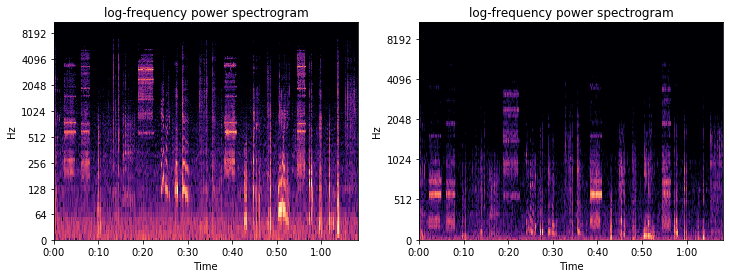

In [6]:
# 3rd channel plot
powerNmelSpectrogram(stft_ch[2])

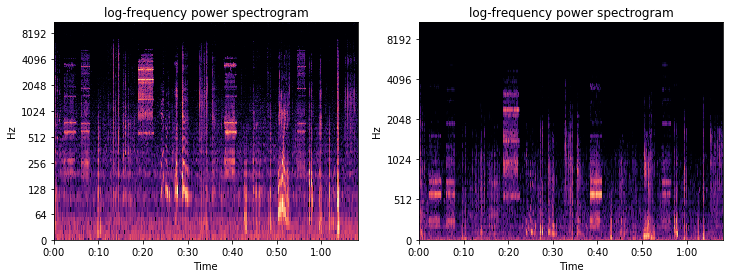

In [7]:
# 4th channel plot
powerNmelSpectrogram(stft_ch[3])